In [129]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time

In [130]:
H2O_pos = '/Users/yatin/Documents/water/structures.xyz'

# read and store the separations
data_h1y = []
data_h1z = []
count = 1


with open(H2O_pos, 'r') as outf:
    for line in outf:
        if (count-3) % 5 == 0:
            data_h1y.append(float(line.strip()[25:35]))
        count +=1
        
        
with open(H2O_pos, 'r') as outf:
    for line in outf:
        if (count-3) % 5 == 0:
            data_h1z.append(float(line.strip()[42:52]))
        count +=1
        
        
# convert from Bohr to angstrom
#print(np.array(data_seps)) # coordinates were recorded, not separation
# data_seps = data_seps / 0.529177

In [131]:
H2O_pos = '/Users/yatin/Documents/water/structures.xyz'

# read and store the separations
data_h2y = []
data_h2z = []
count = 1


with open(H2O_pos, 'r') as outf:
    for line in outf:
        if (count-4) % 5 == 0:
            data_h2y.append(float(line.strip()[24:35]))
        count +=1
        
        
with open(H2O_pos, 'r') as outf:
    for line in outf:
        if (count-4) % 5 == 0:
            data_h2z.append(float(line.strip()[42:52]))
        count +=1
        
        
# convert from Bohr to angstrom
#print(np.array(data_seps)) # coordinates were recorded, not separation
# data_seps = data_seps / 0.529177

In [132]:
H2O_pos = '/Users/yatin/Documents/water/structures.xyz'

# read and store the separations
data_oy = []
data_oz = []
count = 1


with open(H2O_pos, 'r') as outf:
    for line in outf:
        if (count-5) % 5 == 0:
            data_oy.append(float(line.strip()[24:35]))
        count +=1
        
        
with open(H2O_pos, 'r') as outf:
    for line in outf:
        if (count-5) % 5 == 0:
            data_oz.append(float(line.strip()[42:52]))
        count +=1
        
        
# convert from Bohr to angstrom
#print(np.array(data_seps)) # coordinates were recorded, not separation
# data_seps = data_seps / 0.529177

In [133]:
H2O_pos = '/Users/yatin/Documents/water/energies.txt'

# read and store the separations
energy = []

with open(H2O_pos, 'r') as outf:
    for line in outf:
        energy.append(float(line))

In [134]:
bond_1 = []
bond_2 = []
side3 = []
for loc in range(0, len(data_oy)):
    bond_1.append(math.sqrt((data_oy[loc]-data_h1y[loc])**2+(data_oz[loc]-data_h1z[loc])**2))
    bond_2.append(math.sqrt((data_oy[loc]-data_h2y[loc])**2+(data_oz[loc]-data_h2z[loc])**2))
    side3.append(math.sqrt((data_h2y[loc]-data_h1y[loc])**2+(data_h2z[loc]-data_h1z[loc])**2))

In [135]:
angle = []

for location in range(0,len(data_oy)):
    angle.append(np.arccos((bond_1[location]**2+bond_2[location]**2-side3[location]**2)/(2*bond_1[location]*bond_2[location])))


In [136]:
dataset = []

for i in range (0, len(data_oy)):
    l = []
    l.append(bond_1[i])
    l.append(bond_2[i])
    l.append(angle[i])
    dataset.append(l)


In [137]:
X = dataset


In [138]:
from sklearn.cluster import KMeans
 
model = KMeans(n_clusters=30)
minsos = []
l = []
closepts = []
m = []
n = []
closest = []
closelbl = []
smallest = 9999
for i in range(50):

    model.fit(X)
    y_pred = model.predict(X)
    l = []
    m = []
    n = []
    for i in {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}:
        for j in {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}[i]:
            if math.sqrt((dataset[j][0]-model.cluster_centers_[i][0])**2+(dataset[j][1]-model.cluster_centers_[i][1])**2+(dataset[j][2]-model.cluster_centers_[i][2])**2) < smallest:
                smallest = math.sqrt((dataset[j][0]-model.cluster_centers_[i][0])**2+(dataset[j][1]-model.cluster_centers_[i][1])**2+(dataset[j][2]-model.cluster_centers_[i][2])**2)
                closest = dataset[j]
                closestlabel = j
        l.append(smallest)
        m.append(closest)
        n.append(closestlabel)
        smallest = 9999
    minsos.append(l)
    closepts.append(m)
    closelbl.append(n)

In [139]:
smallestsos = 9999
sos = 0
mark = 0
for i in range(len(minsos)):
    sos = 0
    for j in minsos[i]:
        sos = sos+j**2
    if sos < smallestsos:
        smallestsos = sos
        mark = i

trainingset = closepts[mark]
totallbl = closelbl[mark]


print(trainingset)
print(totallbl)


[[0.8289395733384061, 0.8186475698424538, 1.9587456325548271], [0.9196100999067252, 0.8387968631576598, 2.12702226299341], [0.9502592211318578, 0.8013072636494439, 1.9499089602941688], [0.9670107434486941, 0.9031112603314717, 2.1800723403980227], [0.8808837728374883, 0.834448544331848, 2.0236326617568636], [0.9491729879137207, 0.920737151846716, 2.00882961336629], [0.8164197096788639, 0.8075748536018997, 1.887384209085066], [0.9670744125646904, 0.9260075168671585, 2.0765802643618487], [0.9450203853032932, 0.8974456752114479, 1.8902451529846218], [0.8828585151409737, 0.8477286239263193, 2.192324601983944], [0.9128299858803363, 0.8875599226090987, 2.0740893055411624], [0.9324527776929646, 0.8194322971736061, 2.073261895670557], [0.9503486715746408, 0.8097881547409526, 1.894663272867008], [0.9493022919654835, 0.8200624430618046, 2.001147940562452], [0.9814311265725222, 0.9550572600201814, 2.124019852679744], [0.9900410674818452, 0.8389930983897973, 2.192261092296157], [0.902771566342274, 

In [147]:
testset = []
testen = []
for k in dataset:
    testset.append(k)

for k in energy:
    testen.append(k)


for i in range(len(dataset)):
    for j in range(len(trainingset)):
        if trainingset[j] == dataset[i]:
            testset.remove(trainingset[j])
            testen.remove(energy[i])
test = np.array(testset)
testenergy = np.array(testen)


In [141]:
A = trainingset
B = []
for i in totallbl:
    B.append(energy[i])
training = np.array(A)
trainingenergy = np.array(B)

(30, 3)
(30,)


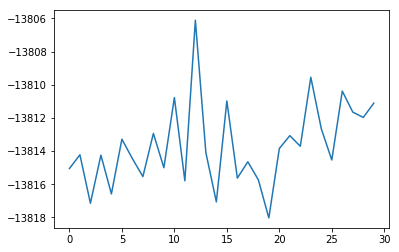

In [142]:
print(data.shape)
print(target.shape)
plt.plot(target)

/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


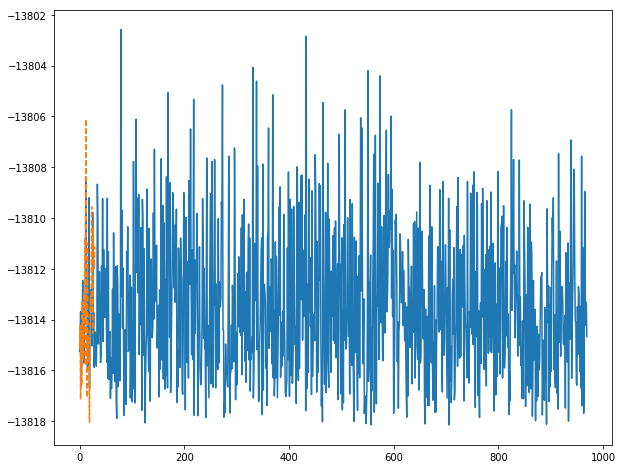

In [146]:
from sklearn.gaussian_process import GaussianProcessRegressor

gp = GaussianProcessRegressor(n_restarts_optimizer=10)
gp.fit(data, target)
target_pred, std = gp.predict(test, return_std=True)

plt.figure(figsize = (10, 8))
plt.plot(target_pred)
plt.plot(target, '--')

In [165]:
from sklearn.cluster import KMeans

def split(X):
    cluster = int(input())
    model = KMeans(n_clusters=cluster)
    minsos = []
    l = []
    closepts = []
    m = []
    n = []
    closest = []
    closelbl = []
    smallest = 9999
    for i in range(50):

        model.fit(X)
        y_pred = model.predict(X)
        l = []
        m = []
        n = []
        for i in {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}:
            for j in {i: np.where(model.labels_ == i)[0] for i in range(model.n_clusters)}[i]:
                if math.sqrt((dataset[j][0]-model.cluster_centers_[i][0])**2+(dataset[j][1]-model.cluster_centers_[i][1])**2+(dataset[j][2]-model.cluster_centers_[i][2])**2) < smallest:
                    smallest = math.sqrt((dataset[j][0]-model.cluster_centers_[i][0])**2+(dataset[j][1]-model.cluster_centers_[i][1])**2+(dataset[j][2]-model.cluster_centers_[i][2])**2)
                    closest = dataset[j]
                    closestlabel = j
            l.append(smallest)
            m.append(closest)
            n.append(closestlabel)
            smallest = 9999
        minsos.append(l)
        closepts.append(m)
        closelbl.append(n)
    
    
    smallestsos = 9999
    sos = 0
    mark = 0
    for i in range(len(minsos)):
        sos = 0
        for j in minsos[i]:
            sos = sos+j**2
        if sos < smallestsos:
            smallestsos = sos
            mark = i

    trainingset = closepts[mark]
    totallbl = closelbl[mark]

    testset = []
    testen = []
    for k in dataset:
        testset.append(k)
    for k in energy:
        testen.append(k)
    for i in range(len(dataset)):
        for j in range(len(trainingset)):
            if trainingset[j] == dataset[i]:
                testset.remove(trainingset[j])
                testen.remove(energy[i])
    test = np.array(testset)
    testenergy = np.array(testen)

    A = trainingset
    B = []
    for i in totallbl:
        B.append(energy[i])
    training = np.array(A)
    trainingenergy = np.array(B)
    
    return(training)
    return(trainingenergy)
    return(test)
    return(testenergy)

In [166]:
from sklearn.gaussian_process import GaussianProcessRegressor

def run_gaussian(data, target, tester):
    gp = GaussianProcessRegressor(n_restarts_optimizer=10)
    gp.fit(data, target)
    target_pred, std = gp.predict(tester, return_std=True)
    
    return (target_pred)

In [167]:
def plot_predict(pred, correct):
    plt.figure(figsize = (10, 8))
    plt.plot(pred)
    plt.plot(correct, '--')

In [168]:
from sklearn.metrics import mean_absolute_error

def error_det(pred, correct):
    err = mean_absolute_error(correct, pred)
    return err

2


/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


0.038046464142111686

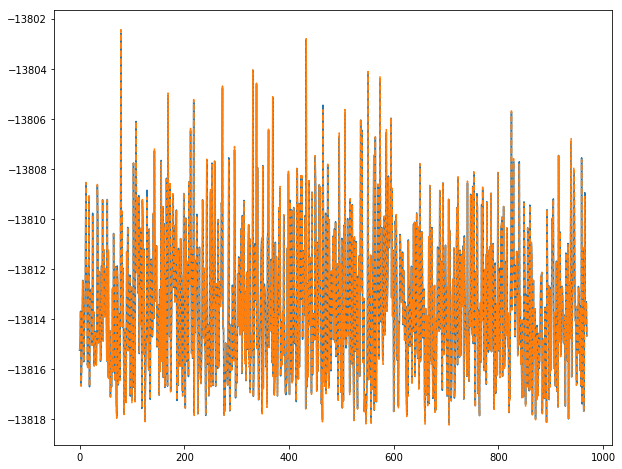

In [172]:
split(dataset)
run_gaussian(training, trainingenergy, test)
plot_predict(target_pred, testenergy)
error_det(testenergy, target_pred)

# References
1. 